In [89]:
(* Generate grid *)
nPts = 4;
xBase = Subdivide[0, 1, nPts - 1];
(* Grid cell size *)
h = xBase[[1;;2]] . {-1,1};
pts = Flatten[Table[{xBase[[j]], xBase[[i]]}, {i,1,nPts}, {j,1,nPts}], 1];
(* Generate elements *)
(* Point order is bottom-left, bottom-right, top-left, top-right *)
elements = {};
For[iy = 0, iy < nPts - 1, iy++,
    For[ix = 0, ix < nPts - 1, ix++,
    (
        i0 = iy * nPts + ix;
        ids = {i0, i0 + 1, i0 + nPts, i0 + nPts + 1} + 1;
        AppendTo[elements, ids];
    )]];

1   0   0   0

0   1   0   0

0   0   1   0

0   0   0   1
1      1     1     1
--    ---   ---   ---
81    162   162   324

 1    1      1     1
---   --    ---   ---
162   81    324   162

 1     1    1      1
---   ---   --    ---
162   324   81    162

 1     1     1    1
---   ---   ---   --
324   162   162   81
2        1      1      1
-      -(-)   -(-)   -(-)
3        6      6      3

  1    2        1      1
-(-)   -      -(-)   -(-)
  6    3        3      6

  1      1    2        1
-(-)   -(-)   -      -(-)
  6      3    3        6

  1      1      1    2
-(-)   -(-)   -(-)   -
  3      6      6    3
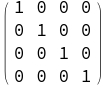
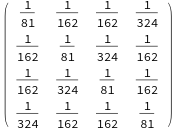
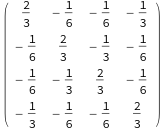

In [99]:
(* Basis functions *)
psi = { (1 - x/h) * (1 - y/h), (x/h) * (1 - y/h), (1 - x/h) * (y/h), (x / h) * (y / h)};
gpsi = Grad[psi, {x,y}];
(* Reference element points - use the fact that the grid is regular and starts at (0,0) *)
stdPts = pts[[elements[[1]]]];

(* Check that they are good *)
Table[psi /. {x -> stdPts[[i,1]], y -> stdPts[[i,2]]}, {i,1,4}] // MatrixForm

(* Calculate local mass and stiffness matrices *)
(* First calculate the integrands *)
lm0i = KroneckerProduct[psi, psi];
lm1i = gpsi . Transpose[gpsi];
(* Calculate the matrices themselves *)
lm0 = Integrate[lm0i, {x,0,h}, {y,0,h}];
lm1 = Integrate[lm1i, {x,0,h}, {y,0,h}];
lm0 // MatrixForm
lm1 // MatrixForm

0.666667    -0.166667   -0.166667   -0.333333

-0.166667   0.666667    -0.333333   -0.166667

-0.166667   -0.333333   0.666667    -0.166667

-0.333333   -0.166667   -0.166667   0.666667
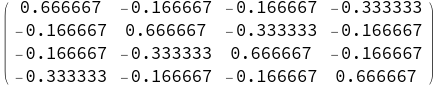

In [88]:
lm1 //N // MatrixForm

In [115]:
(* Assemble the global mass & stiffness matrices *)
m0 = SparseArray[{},{nPts^2,nPts^2}];
m1 = SparseArray[{},{nPts^2,nPts^2}];
For[i = 1, i <= Length[elements], i++,
(
    ids = elements[[i]];
    m0[[ids, ids]] += lm0;
    m1[[ids, ids]] += lm1;
)];

2        1                    1      1
-      -(-)                 -(-)   -(-)
3        6    0      0        6      3    0      0      0      0      0      0
 


>    0      0      0      0

  1    4        1             1      1      1
-(-)   -      -(-)          -(-)   -(-)   -(-)
  6    3        6    0        3      3      3    0      0      0      0      0
 


>    0      0      0      0

         1    4        1             1      1      1
       -(-)   -      -(-)          -(-)   -(-)   -(-)
0        6    3        6    0        3      3      3    0      0      0      0
 


>    0      0      0      0

                1    2                      1      1
              -(-)   -                    -(-)   -(-)
0      0        6    3      0      0        3      6    0      0      0      0
 


>    0      0      0      0

  1      1                  4        1                    1      1
-(-)   -(-)                 -      -(-)                 -(-)   -(-)
  6      3    0      0      3        3    0      0        6      3    0      0
 


>    0      0      0      0

  1      1      1             1    8        1             1      1      1
-(-)   -(-)   -(-)          -(-)   -      -(-)          -(-)   -(-)   -(-)
  3      3      3    0        3    3        3    0        3      3      3    0
 


>    0      0      0      0

         1      1      1             1    8        1             1      1      1
       -(-)   -(-)   -(-)          -(-)   -      -(-)          -(-)   -(-)   -(-)
0        3      3      3    0        3    3        3    0        3      3      3
 


>    0      0      0      0

                1      1                    1    4                      1      1
              -(-)   -(-)                 -(-)   -                    -(-)   -(-)
0      0        3      6    0      0        3    3      0      0        3      6
 


>    0      0      0      0

                              1      1                  4        1
                            -(-)   -(-)                 -      -(-)
0      0      0      0        6      3    0      0      3        3    0      0
 
       1      1
     -(-)   -(-)
>      6      3    0      0

                              1      1      1             1    8        1
                            -(-)   -(-)   -(-)          -(-)   -      -(-)
0      0      0      0        3      3      3    0        3    3        3    0
 
       1      1      1
     -(-)   -(-)   -(-)
>      3      3      3    0

                                     1      1      1             1    8        1
                                   -(-)   -(-)   -(-)          -(-)   -      -(-)
0      0      0      0      0        3      3      3    0        3    3        3
 
              1      1      1
            -(-)   -(-)   -(-)
>    0        3      3      3

                                            1      1                    1    4
                                          -(-)   -(-)                 -(-)   -
0      0      0      0      0      0        3      6    0      0        3    3
 
                     1      1
                   -(-)   -(-)
>    0      0        3      6

                                                          1      1
                                                        -(-)   -(-)
0      0      0      0      0      0      0      0        6      3    0      0
 
     2        1
     -      -(-)
>    3        6    0      0

                                                          1      1      1
                                                        -(-)   -(-)   -(-)
0      0      0      0      0      0      0      0        3      3      3    0
 
       1    4        1
     -(-)   -      -(-)
>      6    3        6    0

                                                                 1      1      1
                                                               -(-)   -(-)   -(-)
0      0      0      0      0      0      0      0      0        3      3      3
 
              1    4 
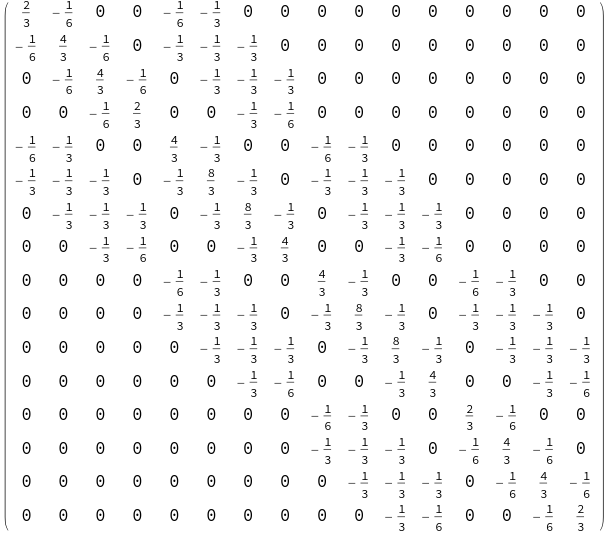

In [120]:
m1 // MatrixForm

In [65]:
(* Additonal functions *)
(* Kirchoff transform *)
g[s_] := s^2 / 2;
(* Initial condition *)
u0[p_] := If[p^2 . {1,1} <= 1/16, 100, 0];
q0 = Map[u0, pts];

(* M0^-1 * M1 *)
z = LinearSolve[m0, m1];

makeInterp[qi_] := Interpolation[Transpose[{pts, Flatten[qi]}], InterpolationOrder -> 2];

-Graphics3D-
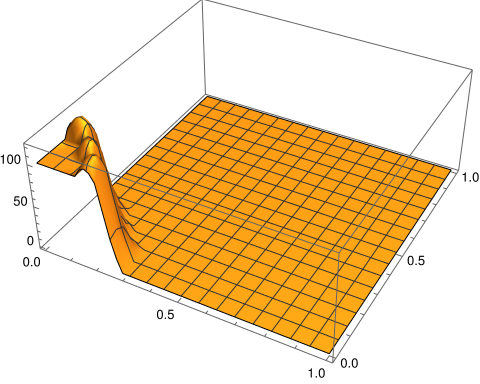

In [28]:
f = makeInterp[q0];
Plot3D[f[x,y], {x,0,1}, {y,0,1}, PlotRange -> All]

In [41]:
solveEuler[tau0_, Tmax_] := 
(
    ts = Subdivide[0, Tmax, Ceiling[Tmax / tau0]];
    nT = Length[ts];
    tau = ts[[2]] - ts[[1]];
    qs = ConstantArray[0, {nT, nPts^2}];
    qs[[1]] = q0;
    For[i = 2, i <= nT, i++,
    (
        qp = qs[[i-1]];
        qs[[i]] = LinearSolve[m0, m0 . qp - tau * m1 . Map[g, qp]];
    )];
    Return[{ts,qs}];
)

2001
-Graphics3D-
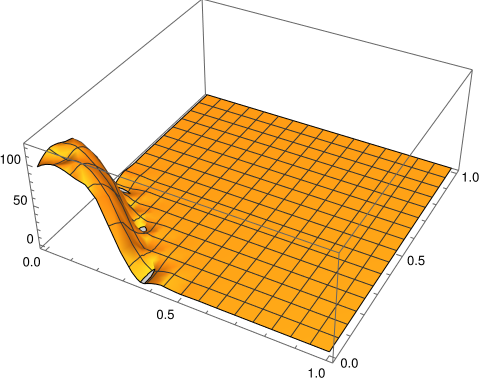

In [43]:
{ts,qs} = solveEuler[0.000005, 0.01];
Length[ts]
f = makeInterp[qs[[4]]];
Plot3D[f[x,y], {x,0,1}, {y,0,1}, PlotRange -> {-5,125}]

In [74]:
(* Crank-Nicholson left hand side *)
cnLhs[qp_, qc_, tau_] := m0 . ((qc - qp) / tau) + m1 . Map[g, (qc + qp) / 2];

simpleIter[qp_, qc0_, tau_] := Module[{qc,L,lastErr,i}, 
(
    qc = qc0;
    L = cnLhs[qp, qc, tau];
    lastErr = Norm[L];
    Print["Start = ", lastErr];
    For[i = 1, i <= 10, i++,
    (
        qcNew = qp  - tau * (z . Map[g, (qc + qp) / 2]);
        L = cnLhs[qp, qcNew, tau];
        errNew = Norm[L];
        Print[errNew];
        If[errNew >= lastErr, Return[qc]];
        If[errNew <= 0.001, Return[qcNew]];
        lastErr = errNew;
        qc = qcNew;
    )];
    Return[qc];
)];

jacobi[qp_, qc_, tau_] :=
(
    eps = 0.0001;
    y0 = cnLhs[qp, qc, tau];
    J = ConstantArray[0, {nPts^2, nPts^2}];
    For[i=1, i <= nPts^2, i++
    (
        Print[i];
        If[i > 225, Break[]];
        q1 = qc;
        q1[[i]] += eps;
        y1 = L[qp, q1, tau];
        J[[i]] = (y1 - y0) / eps;
    )];
    Return[Transpose[J]];
)

newton1[qp_, qc0_, tau_] := Module[{qc,L,lastErr,i}, 
(
    qc = qc0;
    L = cnLhs[qp, qc, tau];
    lastErr = Norm[L];
    Print["Start = ", lastErr];
    For[i = 1, i <= 10, i++,
    (
        qcNew = qp  - tau * (z . Map[g, (qc + qp) / 2]);
        L = cnLhs[qp, qcNew, tau];
        errNew = Norm[L];
        Print[errNew];
        If[errNew >= lastErr, Return[qc]];
        If[errNew <= 0.001, Return[qcNew]];
        lastErr = errNew;
        qc = qcNew;
    )];
    Return[qc];
)];

In [82]:
nPts^2
Length[q0]
j1 = jacobi[q0, q0, 0.000005];

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226


225
225

In [ ]:
j1

In [49]:
solveCnSimpleIter[tau0_, Tmax_] := 
(
    ts = Subdivide[0, Tmax, Ceiling[Tmax / tau0]];
    nT = Length[ts];
    tau = ts[[2]] - ts[[1]];
    qs = ConstantArray[0, {nT, nPts^2}];
    qs[[1]] = q0;
    For[i = 2, i <= nT, i++,
    (
        Print[i];
        qp = qs[[i-1]];
        qs[[i]] = simpleIter[qp, qp, tau];
    )];
    Return[{ts,qs}];
)

In [50]:
{ts,qs} = solveCnSimpleIter[0.000005, 0.01];

2
Start = 15000.
4975.04
3084.04
2442.6
2178.99
2074.8
2049.74
2066.76
3
Start = 10462.9
2744.81
2186.71
2129.46
2140.76
4
Start = 8507.97
2483.7
2174.13
2167.44
2192.28
5
Start = 6839.56
2231.12
2190.73
2207.22
6
Start = 6006.89
2191.57
2154.25
2142.31
2126.88
2110.79
2094.81
2079.1
2063.63
2048.38
2033.31
7
Start = 5373.32
1996.85
1947.78
1912.97
1876.37
1840.06
1804.46
1769.66
1735.58
1702.24
1669.56
8
Start = 4845.81
1624.21
1564.53
1517.2
1469.83
1423.75
1379.13
1335.99
1294.23
1253.83
1214.7
9
Start = 4404.77
1175.98
1115.04
1067.63
1021.37
977.016
934.606
894.089
855.344
818.308
782.877
10
Start = 4056.45
760.336
705.378
666.817
629.876
594.928
561.932
530.793
501.389
473.627
447.404
11
Start = 3788.84
445.079
396.761
370.277
345.329
322.033
300.319
280.082
261.214
243.623
227.218
12
Start = 3574.89
247.403
199.062
183.331
168.804
155.416
143.099
131.766
121.333
111.729
102.885
13
Start = 3391.46
149.134
89.5705
81.255
73.8564
67.1341
61.0317
55.4889
50.4517
45.8727
41.7097
14
S

Start = 559.517
4.21771
0.0564743
0.00230458
0.000230452
112
Start = 554.105
4.14372
0.0553435
0.00223799
0.000220987
113
Start = 548.814
4.07029
0.054116
0.00216854
0.000211474
114
Start = 543.643
3.99756
0.0528094
0.00209658
0.000201955
115
Start = 538.589
3.92566
0.0514423
0.00202249
0.00019247
116
Start = 533.649
3.85464
0.0500333
0.0019467
0.000183056
117
Start = 528.82
3.78456
0.0486004
0.00186966
0.000173746
118
Start = 524.099
3.71543
0.0471606
0.00179182
0.00016457
119
Start = 519.484
3.64725
0.0457295
0.00171363
0.000155556
120
Start = 514.971
3.57999
0.044321
0.00163557
0.000146731
121
Start = 510.558
3.51362
0.0429471
0.00155808
0.00013812
122
Start = 506.241
3.44811
0.0416176
0.00148161
0.000129745
123
Start = 502.018
3.38343
0.0403399
0.00140657
0.000121632
124
Start = 497.885
3.31953
0.0391195
0.00133339
0.000113802
125
Start = 493.839
3.25638
0.0379597
0.00126244
0.00010628
126
Start = 489.876
3.19399
0.0368618
0.00119409
0.0000990899
127
Start = 485.994
3.13233
0.03582

0.68937
0.00376329
0.0000927833
271
Start = 212.812
0.685108
0.00373136
0.00009123
272
Start = 211.928
0.680866
0.00370331
0.0000897352
273
Start = 211.049
0.676637
0.00367883
0.0000883005
274
Start = 210.176
0.672418
0.0036576
0.0000869271
275
Start = 209.308
0.668204
0.00363929
0.0000856156
276
Start = 208.446
0.663994
0.00362356
0.0000843665
277
Start = 207.589
0.659785
0.00361007
0.0000831797
278
Start = 206.737
0.655576
0.00359847
0.0000820549
279
Start = 205.891
0.651366
0.00358844
0.0000809913
280
Start = 205.05
0.647156
0.00357964
0.000079988
281
Start = 204.214
0.642945
0.00357176
0.0000790435
282
Start = 203.384
0.638737
0.00356452
0.0000781564
283
Start = 202.559
0.634532
0.00355761
0.0000773246
284
Start = 201.738
0.630334
0.00355078
0.0000765461
285
Start = 200.923
0.626145
0.00354379
0.0000758186
286
Start = 200.113
0.621968
0.0035364
0.0000751394
287
Start = 199.308
0.617807
0.00352841
0.0000745059
288
Start = 198.508
0.613668
0.00351963
0.0000739152
289
Start = 197.713


Start = 126.448
0.266248
0.00104554
0.0000173493
427
Start = 126.111
0.26498
0.00104317
0.0000173711
428
Start = 125.776
0.26373
0.00104103
0.000017397
429
Start = 125.442
0.262497
0.00103909
0.0000174263
430
Start = 125.109
0.261282
0.00103731
0.0000174584
431
Start = 124.776
0.260084
0.00103564
0.0000174927
432
Start = 124.445
0.258904
0.00103405
0.0000175286
433
Start = 124.115
0.257742
0.0010325
0.0000175655
434
Start = 123.786
0.256598
0.00103096
0.0000176029
435
Start = 123.458
0.255471
0.00102939
0.0000176402
436
Start = 123.13
0.254363
0.00102778
0.0000176769
437
Start = 122.804
0.253273
0.00102608
0.0000177127
438
Start = 122.479
0.252201
0.00102429
0.000017747
439
Start = 122.154
0.251148
0.00102236
0.0000177794
440
Start = 121.831
0.250114
0.00102028
0.0000178097
441
Start = 121.508
0.249099
0.00101803
0.0000178374
442
Start = 121.187
0.248103
0.0010156
0.0000178622
443
Start = 120.866
0.247126
0.00101297
0.0000178839
444
Start = 120.546
0.246169
0.00101012
0.0000179021
445


Start = 81.0434
0.125734
0.000383971
622
Start = 80.894
0.125264
0.000383769
623
Start = 80.745
0.124797
0.000383551
624
Start = 80.5965
0.124331
0.00038331
625
Start = 80.4484
0.123867
0.00038304
626
Start = 80.3007
0.123405
0.000382737
627
Start = 80.1534
0.122945
0.000382396
628
Start = 80.0065
0.122487
0.000382012
629
Start = 79.8601
0.122032
0.000381581
630
Start = 79.714
0.121579
0.0003811
631
Start = 79.5684
0.121129
0.000380564
632
Start = 79.4231
0.120682
0.000379971
633
Start = 79.2782
0.120238
0.000379319
634
Start = 79.1338
0.119796
0.000378604
635
Start = 78.9897
0.119358
0.000377825
636
Start = 78.846
0.118924
0.000376979
637
Start = 78.7027
0.118493
0.000376066
638
Start = 78.5597
0.118065
0.000375085
639
Start = 78.4171
0.117641
0.000374034
640
Start = 78.2749
0.117221
0.000372913
641
Start = 78.1331
0.116806
0.000371722
642
Start = 77.9916
0.116394
0.000370461
643
Start = 77.8505
0.115987
0.00036913
644
Start = 77.7097
0.115584
0.000367729
645
Start = 77.5693
0.115185


0.000179058
820
Start = 58.0041
0.0748535
0.000177957
821
Start = 57.92
0.0746766
0.000176884
822
Start = 57.8362
0.0744996
0.000175841
823
Start = 57.7526
0.0743224
0.000174828
824
Start = 57.6694
0.0741451
0.000173847
825
Start = 57.5864
0.0739675
0.000172898
826
Start = 57.5037
0.0737895
0.000171981
827
Start = 57.4213
0.0736111
0.000171098
828
Start = 57.3392
0.0734322
0.000170248
829
Start = 57.2573
0.0732527
0.000169431
830
Start = 57.1757
0.0730726
0.000168649
831
Start = 57.0944
0.0728918
0.000167901
832
Start = 57.0134
0.0727102
0.000167186
833
Start = 56.9327
0.0725278
0.000166505
834
Start = 56.8522
0.0723446
0.000165858
835
Start = 56.772
0.0721604
0.000165245
836
Start = 56.6921
0.0719753
0.000164664
837
Start = 56.6125
0.0717891
0.000164116
838
Start = 56.5331
0.0716019
0.000163599
839
Start = 56.454
0.0714135
0.000163114
840
Start = 56.3752
0.071224
0.000162659
841
Start = 56.2966
0.0710333
0.000162233
842
Start = 56.2184
0.0708414
0.000161837
843
Start = 56.1403
0.07064

0.0462275
0.0000902585
1015
Start = 45.1613
0.0461744
0.0000904626
1016
Start = 45.1059
0.046121
0.0000906657
1017
Start = 45.0506
0.0460672
0.0000908675
1018
Start = 44.9954
0.0460131
0.0000910672
1019
Start = 44.9403
0.0459587
0.0000912645
1020
Start = 44.8853
0.0459039
0.0000914588
1021
Start = 44.8304
0.0458487
0.0000916497
1022
Start = 44.7756
0.0457932
0.0000918366
1023
Start = 44.7209
0.0457373
0.0000920192
1024
Start = 44.6663
0.045681
0.0000921969
1025
Start = 44.6118
0.0456244
0.0000923695
1026
Start = 44.5574
0.0455675
0.0000925364
1027
Start = 44.5031
0.0455102
0.0000926974
1028
Start = 44.4489
0.0454525
0.000092852
1029
Start = 44.3948
0.0453945
0.0000929999
1030
Start = 44.3408
0.0453362
0.0000931408
1031
Start = 44.2869
0.0452775
0.0000932744
1032
Start = 44.2331
0.0452185
0.0000934003
1033
Start = 44.1795
0.0451592
0.0000935184
1034
Start = 44.1259
0.0450996
0.0000936283
1035
Start = 44.0724
0.0450397
0.0000937298
1036
Start = 44.0191
0.0449795
0.0000938226
1037
Start =

0.0000640318
1202
Start = 36.7349
0.0328563
0.000063942
1203
Start = 36.6999
0.0327599
0.0000638483
1204
Start = 36.665
0.0326636
0.0000637507
1205
Start = 36.6302
0.0325674
0.000063649
1206
Start = 36.5954
0.0324713
0.0000635433
1207
Start = 36.5607
0.0323753
0.0000634334
1208
Start = 36.526
0.0322796
0.0000633193
1209
Start = 36.4915
0.032184
0.0000632008
1210
Start = 36.457
0.0320886
0.000063078
1211
Start = 36.4226
0.0319934
0.0000629507
1212
Start = 36.3883
0.0318985
0.000062819
1213
Start = 36.354
0.0318039
0.0000626827
1214
Start = 36.3198
0.0317095
0.0000625418
1215
Start = 36.2857
0.0316155
0.0000623964
1216
Start = 36.2516
0.0315218
0.0000622463
1217
Start = 36.2176
0.0314285
0.0000620915
1218
Start = 36.1836
0.0313356
0.0000619321
1219
Start = 36.1498
0.031243
0.0000617679
1220
Start = 36.116
0.0311509
0.0000615991
1221
Start = 36.0822
0.0310592
0.0000614256
1222
Start = 36.0485
0.030968
0.0000612473
1223
Start = 36.0149
0.0308773
0.0000610644
1224
Start = 35.9813
0.0307871


0.0000395465
1390
Start = 30.9332
0.0239109
0.0000395762
1391
Start = 30.9057
0.0238814
0.0000396032
1392
Start = 30.8782
0.0238518
0.0000396275
1393
Start = 30.8508
0.0238221
0.0000396491
1394
Start = 30.8235
0.0237923
0.000039668
1395
Start = 30.7961
0.0237624
0.000039684
1396
Start = 30.7689
0.0237324
0.0000396972
1397
Start = 30.7416
0.0237024
0.0000397075
1398
Start = 30.7144
0.0236723
0.000039715
1399
Start = 30.6872
0.0236421
0.0000397196
1400
Start = 30.6601
0.0236119
0.0000397212
1401
Start = 30.633
0.0235816
0.0000397199
1402
Start = 30.6059
0.0235513
0.0000397157
1403
Start = 30.5789
0.0235209
0.0000397085
1404
Start = 30.552
0.0234905
0.0000396983
1405
Start = 30.525
0.0234601
0.0000396852
1406
Start = 30.4981
0.0234297
0.000039669
1407
Start = 30.4713
0.0233992
0.00003965
1408
Start = 30.4444
0.0233687
0.0000396279
1409
Start = 30.4177
0.0233382
0.0000396029
1410
Start = 30.3909
0.0233077
0.0000395749
1411
Start = 30.3642
0.0232771
0.000039544
1412
Start = 30.3376
0.023246

0.0190057
0.0000275834
1578
Start = 26.4458
0.0189763
0.0000275907
1579
Start = 26.4256
0.0189467
0.000027598
1580
Start = 26.4054
0.0189169
0.0000276051
1581
Start = 26.3853
0.0188871
0.000027612
1582
Start = 26.3652
0.0188571
0.0000276186
1583
Start = 26.3451
0.018827
0.000027625
1584
Start = 26.3251
0.0187968
0.000027631
1585
Start = 26.3051
0.0187665
0.0000276367
1586
Start = 26.2851
0.0187361
0.0000276419
1587
Start = 26.2652
0.0187055
0.0000276467
1588
Start = 26.2453
0.0186749
0.000027651
1589
Start = 26.2255
0.0186441
0.0000276547
1590
Start = 26.2057
0.0186133
0.0000276579
1591
Start = 26.1859
0.0185823
0.0000276604
1592
Start = 26.1661
0.0185513
0.0000276622
1593
Start = 26.1464
0.0185201
0.0000276633
1594
Start = 26.1268
0.0184889
0.0000276637
1595
Start = 26.1071
0.0184576
0.0000276633
1596
Start = 26.0875
0.0184262
0.000027662
1597
Start = 26.068
0.0183947
0.0000276599
1598
Start = 26.0485
0.0183632
0.0000276569
1599
Start = 26.029
0.0183316
0.000027653
1600
Start = 26.009

Start = 23.1675
0.0142034
0.0000171906
1766
Start = 23.152
0.0141852
0.0000171845
1767
Start = 23.1365
0.0141669
0.0000171796
1768
Start = 23.1211
0.0141487
0.000017176
1769
Start = 23.1057
0.0141305
0.0000171735
1770
Start = 23.0903
0.0141122
0.0000171722
1771
Start = 23.0749
0.0140939
0.0000171721
1772
Start = 23.0595
0.0140755
0.0000171729
1773
Start = 23.0442
0.0140572
0.0000171749
1774
Start = 23.0288
0.0140388
0.0000171778
1775
Start = 23.0135
0.0140204
0.0000171816
1776
Start = 22.9982
0.014002
0.0000171864
1777
Start = 22.9829
0.0139835
0.0000171921
1778
Start = 22.9676
0.0139651
0.0000171985
1779
Start = 22.9524
0.0139466
0.0000172058
1780
Start = 22.9372
0.013928
0.0000172138
1781
Start = 22.9219
0.0139095
0.0000172225
1782
Start = 22.9067
0.0138909
0.0000172319
1783
Start = 22.8916
0.0138723
0.0000172419
1784
Start = 22.8764
0.0138537
0.0000172525
1785
Start = 22.8612
0.013835
0.0000172636
1786
Start = 22.8461
0.0138163
0.0000172752
1787
Start = 22.831
0.0137976
0.0000172873

1953
Start = 20.4911
0.0115682
0.0000133667
1954
Start = 20.4778
0.0115634
0.0000133281
1955
Start = 20.4646
0.0115586
0.0000132901
1956
Start = 20.4514
0.0115538
0.0000132527
1957
Start = 20.4382
0.0115491
0.0000132159
1958
Start = 20.425
0.0115444
0.0000131797
1959
Start = 20.4118
0.0115397
0.0000131441
1960
Start = 20.3986
0.0115351
0.0000131092
1961
Start = 20.3855
0.0115305
0.0000130749
1962
Start = 20.3723
0.011526
0.0000130413
1963
Start = 20.3592
0.0115214
0.0000130083
1964
Start = 20.3461
0.0115169
0.000012976
1965
Start = 20.333
0.0115124
0.0000129443
1966
Start = 20.3199
0.0115079
0.0000129133
1967
Start = 20.3068
0.0115034
0.0000128831
1968
Start = 20.2937
0.011499
0.0000128535
1969
Start = 20.2806
0.0114945
0.0000128245
1970
Start = 20.2676
0.01149
0.0000127963
1971
Start = 20.2546
0.0114856
0.0000127688
1972
Start = 20.2415
0.0114811
0.000012742
1973
Start = 20.2285
0.0114767
0.0000127159
1974
Start = 20.2155
0.0114722
0.0000126905
1975
Start = 20.2025
0.0114678
0.0000126

2001
-Graphics3D-
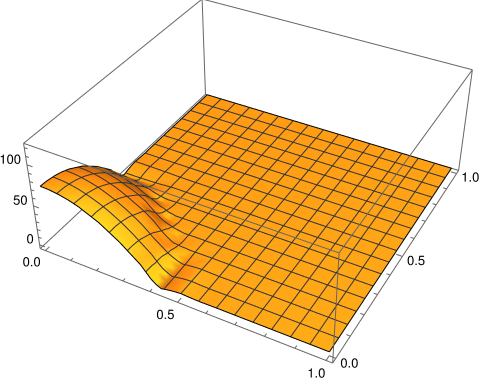

In [67]:
Length[ts]
f = makeInterp[qs[[40]]];
Plot3D[f[x,y], {x,0,1}, {y,0,1}, PlotRange -> {-5,125}]